1. Load and Explore Iris Dataset

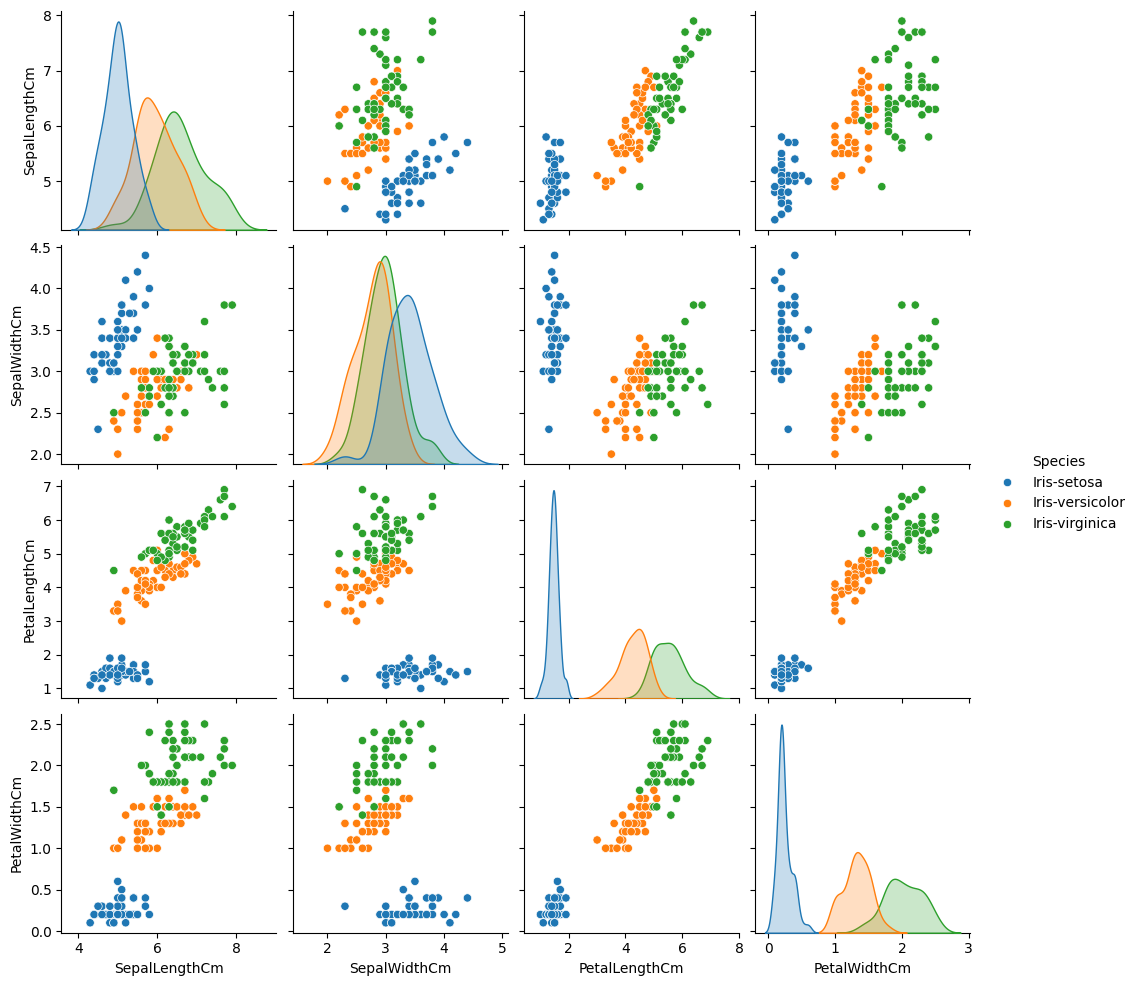

In [1]:
import rbfn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

iris = pd.read_csv("./data/Iris.csv").drop(['Id'], axis=1)
sns.pairplot(iris, hue="Species")

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

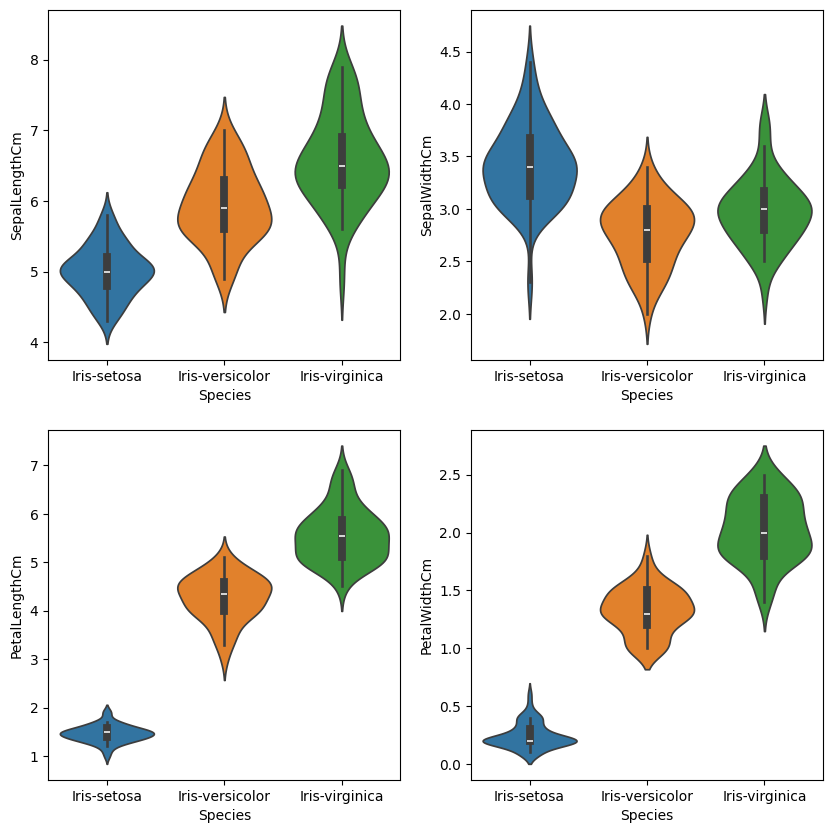

In [2]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10, 10))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, ax=ax1, hue="Species")
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, ax=ax2, hue="Species")
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, ax=ax3, hue="Species")
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, ax=ax4, hue="Species")

2. Get an Optimal Number of Centers

In [3]:
X = np.array(iris.iloc[:,0:4])
y = np.array(pd.factorize(iris['Species'])[0])

opt_number, results, time_consumptions, accuracies = rbfn.get_optimal_centers_quantity(X, y, len(np.unique(y)), 15, test_cycles=500)
print("Time:", time_consumptions)
print("Accuracy:", accuracies)
print("Time X Accuracy: ", results)
print("Optimal number: ", opt_number)

Time: [4.658255577087402, 5.159515619277954, 5.588227033615112, 6.090373516082764, 6.461602687835693, 6.9596757888793945, 7.623459577560425, 8.034716129302979, 8.438602447509766, 9.000027894973755, 9.32685899734497, 9.633345365524292, 9.973822593688965]
Accuracy: [0.7862, 0.8764666666666668, 0.9041333333333335, 0.9201333333333335, 0.9265333333333333, 0.9288666666666668, 0.9302666666666668, 0.932, 0.9319333333333335, 0.9350666666666668, 0.9394666666666667, 0.9370000000000002, 0.9409333333333334]
Time X Accuracy:  [0.9959350423812866, 0.6373721628348024, 0.5357246982892347, 0.48641783148447587, 0.47471241079966237, 0.4950649377822864, 0.5316092478752126, 0.5463606967926021, 0.5743875399271633, 0.5844018113136278, 0.5645858646392822, 0.6069007580280288, 0.5891204545338942]
Optimal number:  7


3. Train Classification Neural Network and Test It

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
labels, centers, output_weights = rbfn.train_rbf_network(X_train, y_train, opt_number)

rbf_train_predictions = rbfn.predict_rbf_network(X_train, centers, output_weights)
print("Train prediction accuracy: ", accuracy_score(y_train, rbf_train_predictions))
print("Train prediction loss: ",rbfn.get_loss(rbf_train_predictions, y_train))

rbf_test_predictions = rbfn.predict_rbf_network(X_test, centers, output_weights)
print("\nTest prediction accuracy: ", accuracy_score(y_test, rbf_test_predictions))
print("Test prediction loss: ", rbfn.get_loss(rbf_test_predictions, y_test))
print("Test precision score: ", precision_score(y_test, rbf_test_predictions, average='weighted'))
print("Test recall score:", recall_score(y_test, rbf_test_predictions, average='weighted'))
print("Test F1 score:", f1_score(y_test, rbf_test_predictions, average='weighted'))

confusion = metrics.confusion_matrix(y_test, rbf_test_predictions)
print(f"Confusion matrix:\n{confusion}")
print(f"\nNormalized confusion matrix:")
for row in confusion:
    if row.sum()!=0:
        print(row / row.sum())


Train prediction accuracy:  0.8916666666666667
Train prediction loss:  0.10833333333333334

Test prediction accuracy:  0.9333333333333333
Test prediction loss:  0.06666666666666667
Test precision score:  0.9454545454545454
Test recall score: 0.9333333333333333
Test F1 score: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]

Normalized confusion matrix:
[1. 0. 0.]
[0. 1. 0.]
[0.         0.18181818 0.81818182]


4. Plotting the Results

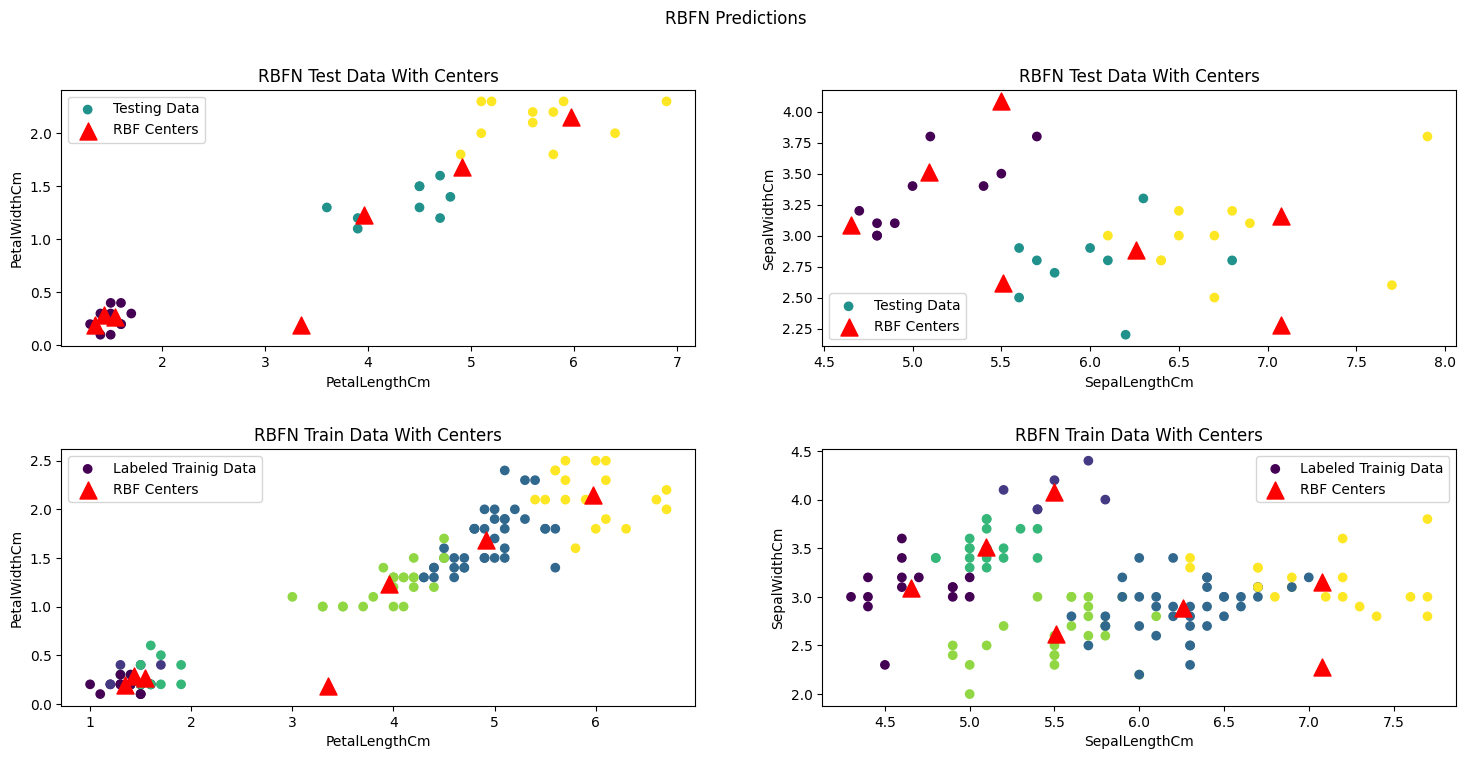

In [6]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust( wspace=0.2, hspace=0.4)
fig.set_figheight(8)
fig.set_figwidth(18)
fig.suptitle('RBFN Predictions')
axs[0,0].set_title('RBFN Test Data With Centers')
axs[0,0].set(xlabel='PetalLengthCm',ylabel='PetalWidthCm')
axs[0,0].scatter(x=X_test[:, 2], y=X_test[:, 3], c=y_test, cmap='viridis', marker='o', label='Testing Data')
axs[0,0].scatter(centers[:, 2], centers[:, 3], c='red', marker='^', s=150, label='RBF Centers',)
axs[0,0].legend()


axs[0,1].set_title('RBFN Test Data With Centers')
axs[0,1].set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
axs[0,1].scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Testing Data')
axs[0,1].scatter(centers[:, 0], centers[:, 1], c='red', marker='^', s=150, label='RBF Centers',)
axs[0,1].legend()

axs[1,0].set_title('RBFN Train Data With Centers')
axs[1,0].set(xlabel='PetalLengthCm',ylabel='PetalWidthCm')
axs[1,0].scatter(X_train[:, 2], X_train[:, 3], c=labels, cmap='viridis', marker='o', label='Labeled Trainig Data')
axs[1,0].scatter(centers[:, 2], centers[:, 3], c='red', marker='^', s=150, label='RBF Centers',)
axs[1,0].legend()

axs[1,1].set_title('RBFN Train Data With Centers')
axs[1,1].set(xlabel='SepalLengthCm',ylabel='SepalWidthCm')
axs[1,1].scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis', marker='o', label='Labeled Trainig Data')
axs[1,1].scatter(centers[:, 0], centers[:, 1], c='red', marker='^', s=150, label='RBF Centers',)
axs[1,1].legend()